## SDA Project

### About the project
We are working analyst in a telecom operator Megaline.And company offers its clients two prepaid plans.We have data of small client selection. Based on this data we must test hypothesis which are given on the description

### Project plan

1. Opening data files and studying general information
2. Preprocessing data
3. Analyzing data
4. Test the hypothesis
5. Drawing overall conclusion

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
users = pd.read_csv('/datasets/megaline_users.csv')
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
print(calls.info())
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3]:
messages = pd.read_csv('/datasets/megaline_messages.csv')
print(messages.info())
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [4]:
internet = pd.read_csv('/datasets/megaline_internet.csv')
print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
plans = pd.read_csv('/datasets/megaline_plans.csv')
print(plans.info())
plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Conclusion

On this step we have opened files and saved them. Then we have used `head()` and `info()` methods to get general information about data

### Step 2. Data preprocessing

In [6]:
#Converting datatypes to necessary type
calls['call_date'] = pd.to_datetime(calls['call_date'],format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'],format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')

#Estimating needed columns from existing one
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
users['month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month




In [7]:
#Checking for duplicates
print('Duplicate rows before deleting for calls:',calls.duplicated().sum())
print('Duplicate rows before deleting for internet:',internet.duplicated().sum())
print('Duplicate rows before deleting for messages:',messages.duplicated().sum())
print('Duplicate rows before deleting for users:',users.duplicated().sum())

#Checking for anomalies
print('Call duration which is equal to 0:',calls[calls['duration'] == 0].shape[0])
print('Megabytes which is equal to 0:',internet[internet['mb_used'] == 0].shape[0])
#Handling anomalies
calls.drop(calls[calls['duration'] == 0].index,inplace=True)
internet.drop(internet[internet['mb_used'] == 0].index,inplace=True)
#Checking job which we have done
print('Call duration which is equal to 0:',calls[calls['duration'] == 0].shape[0])
print('Megabytes which is equal to 0:',internet[internet['mb_used'] == 0].shape[0])

Duplicate rows before deleting for calls: 0
Duplicate rows before deleting for internet: 0
Duplicate rows before deleting for messages: 0
Duplicate rows before deleting for users: 0
Call duration which is equal to 0: 26834
Megabytes which is equal to 0: 13747
Call duration which is equal to 0: 0
Megabytes which is equal to 0: 0


In [8]:
#Calculating number of calls and call duration for each month
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
calls_monthly = calls.pivot_table(index=['user_id','month'],values='duration',aggfunc=['count','sum'])
calls_monthly.columns=['calls_count','call_duration']

#Calculating volume of data used each month
internet['mb_used'] = (internet['mb_used'] / 1024).apply(np.ceil).astype(int)
internet_monthly = internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
internet_monthly.columns= ['gb_monthly']

#Counting messages of each month
messages_monthly = messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count')
messages_monthly.columns=['messages_count']
#Joining all 3 datas into one table to use easier in forward
data = calls_monthly.join(internet_monthly,on=['user_id','month'])
data = data.join(messages_monthly,on=['user_id','month'])
columns = ['call_duration','call_count','gb_montly','messages_count']

data

calls_count  call_duration  gb_monthly  messages_count
user_id month                                                        
1000    12              16            124         4.0            11.0
1001    8               22            182        21.0            30.0
        9               38            315        41.0            44.0
        10              47            393        50.0            53.0
        11              49            426        49.0            36.0
...                    ...            ...         ...             ...
1498    12              32            339        56.0             NaN
1499    9               35            346        37.0             NaN
        10              41            385        52.0             NaN
        11              39            308        43.0             NaN
        12              56            496        58.0             NaN

[2256 rows x 4 columns]

Here we have calculated `calls duration and count`,`volume of data` and `number of messages` for each users for each month using `pivot_table()` method. At the end we have joined all tables int `data` table via `join()` method. We joined other tables into one because it will be easier when we use it.E.g: when we will join user information with their `call`, `data(internet)`,`messages` informations.

In [9]:
#Joining data with user informations
data = data.reset_index(level='user_id')
full_data = pd.merge(data,users,on='user_id')
full_data

,user_id,calls_count,call_duration,gb_monthly,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,month,churn_month
0,1000,16,124,4.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,22,182,21.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1001,38,315,41.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
3,1001,47,393,50.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
4,1001,49,426,49.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,1498,32,339,56.0,NaN,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2,NaN
2252,1499,35,346,37.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN
2253,1499,41,385,52.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN
2254,1499,39,308,43.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN


In [10]:
#Function which calculates profit from each user for each month
def calc_profit(row):
    plan = row['plan']
    calls = row['call_duration']
    messages = row['messages_count']
    internet = row['gb_monthly']
    profit = 0
    if(plan == 'ultimate'):
        profit = 70
        if(calls > 3000):
            profit += (calls - 3000) * 0.01 
        if(messages > 1000):
            profit += (messages - 1000) * 0.01
        if(internet > 30):
            profit += (internet - 30) * 7
    else:
        profit = 20
        if(calls > 500):
            profit += (calls - 500) * 0.03 
        if(messages > 50):
            profit += (messages - 50) * 0.01
        if(internet > 15):
            profit += (internet - 15) * 10
        
    return profit       

In [11]:
#applying method
full_data['profit']  = full_data.apply(calc_profit,axis=1)
full_data

,user_id,calls_count,call_duration,gb_monthly,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,month,churn_month,profit
0,1000,16,124,4.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN,70.00
1,1001,22,182,21.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN,80.00
2,1001,38,315,41.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN,280.00
3,1001,47,393,50.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN,370.03
4,1001,49,426,49.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN,360.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,1498,32,339,56.0,NaN,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2,NaN,430.00
2252,1499,35,346,37.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN,240.00
2253,1499,41,385,52.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN,390.00
2254,1499,39,308,43.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN,300.00


### Conclusion

On this step we have calculated number of calls and their durations, number of messages, volume of data and profit per month for each user. To reach to  final result we used `pivot_table()` and `merge()` methods. And calculation that we have made shows us number of users increasing over the months. And then we wrote a function which calculates monthly `profit` from each user using information from plans table. And during the `joining` data and users tables we had a new missing values. It can be explained by this: E.g: some user uses megaline from 1st month, another user uses from 5th month. When we joined calls, internet, messages information for each month on user which uses from 5th month had missing values previous months

### Step 3.  Analyzing the data

Mean for ultimate_minutes: 409.08
Variance for ultimate_minutes: 12529.96
Standard deviation for ultimate_minutes: 111.94
Normally distributed data lies on: 73.25999999999999 and 744.9


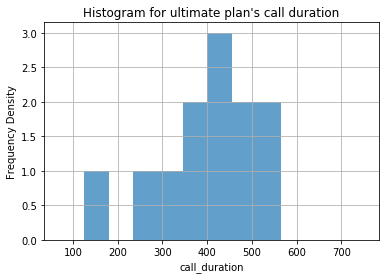

Mean for surf_minutes: 421.42
Variance for surf_minutes: 1586.77
Standard deviation for surf_minutes: 39.83
Normally distributed data lies on: 301.93 and 540.91


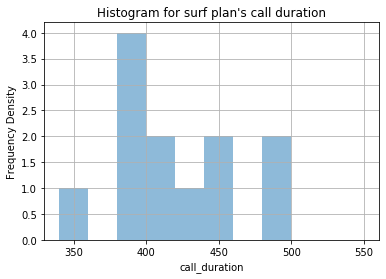

In [12]:
plan_minutes = full_data.pivot_table(index = ['plan','month'],values='call_duration',aggfunc='mean')
plan_minutes = plan_minutes.reset_index(level=['plan','month'])
surf_minutes = plan_minutes.query('plan == "surf"')
ultimate_minutes = plan_minutes.query('plan == "ultimate"').reset_index(drop=True)
mean_um = round(np.mean(ultimate_minutes['call_duration']),2)
var_um = round(np.var(ultimate_minutes['call_duration']),2)
std_um = round(np.std(ultimate_minutes['call_duration']),2)
um_bottom = mean_um - 3 * std_um
um_top = mean_um + 3 * std_um
print("Mean for ultimate_minutes:",mean_um)
print("Variance for ultimate_minutes:",var_um)
print("Standard deviation for ultimate_minutes:",std_um)
print("Normally distributed data lies on:",um_bottom,'and',um_top)

ultimate_minutes.hist('call_duration',bins=[70,125,180,235,290,345,400,455,510,565,620,675,750],grid=True,alpha=0.7)
plt.title("Histogram for ultimate plan's call duration")
plt.xlabel('call_duration')
plt.ylabel('Frequency Density')
plt.show()

mean_sm = round(np.mean(surf_minutes['call_duration']),2)
var_sm = round(np.var(surf_minutes['call_duration']),2)
std_sm = round(np.std(surf_minutes['call_duration']),2)
sm_bottom = mean_sm - 3 * std_sm
sm_top = mean_sm + 3 * std_sm
print("Mean for surf_minutes:",mean_sm)
print("Variance for surf_minutes:",var_sm)
print("Standard deviation for surf_minutes:",std_sm)
print("Normally distributed data lies on:",sm_bottom,'and',sm_top)

surf_minutes.hist('call_duration',bins=[340,360,380,400,420,440,460,480,500,520,550],grid=True,alpha=0.5)
plt.title("Histogram for surf plan's call duration")
plt.xlabel('call_duration')
plt.ylabel('Frequency Density')
plt.show()

Here we have compared `call_duration's` of two plans. As wee see `ultimate`'s median bigger than mean, which we know by left skew of histogram. `surf`'s vice versa mean bigger than median.As wee investigated above intervals everything out of them are outliers. `ultimate` plans call duration bigger than `surf`'s. But `surf`'s minimum call_duration bigger than 300 minutes. And `ultimates` minimum above 100 minutes. `ultimate`'s pick occurs after 400 minutes. `surf`'s occures before 400. 

Mean for ultimate_messages: 46.16
Variance for ultimate_messages: 86 2
Standard deviation for ultimate_messages: 9.27
Normally distributed data lies on: 18.35 and 73.97


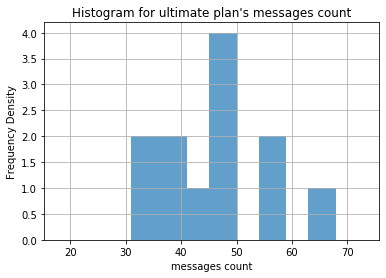

Mean for surf_messages: 38.83
Variance for surf_messages: 33.87
Standard deviation for surf_messages: 5.82
Normally distributed data lies on: 21.36 and 56.29


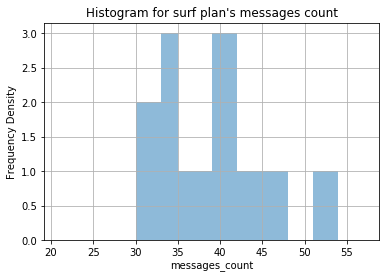

In [13]:
plan_messages = full_data.pivot_table(index = ['plan','month'],values='messages_count',aggfunc='mean')
plan_messages = plan_messages.reset_index(level=['plan','month'])
surf_messages = plan_messages.query('plan == "surf"')
ultimate_messages = plan_messages.query('plan == "ultimate"').reset_index(drop=True)

mean_ums = np.mean(ultimate_messages['messages_count'])
var_ums = np.var(ultimate_messages['messages_count'])
std_ums = np.std(ultimate_messages['messages_count'])
ums_bottom = mean_ums - 3 * std_ums
ums_top = mean_ums + 3 * std_ums
print("Mean for ultimate_messages:",round(mean_ums,2))
print("Variance for ultimate_messages:",round(var_ums),2)
print("Standard deviation for ultimate_messages:",round(std_ums,2))
print("Normally distributed data lies on:",round(ums_bottom,2),'and',round(ums_top,2))

ultimate_messages.hist('messages_count',bins=[18,24,27,31,36,41,45,50,54,59,63,68,73],grid=True,alpha=0.7)
plt.title("Histogram for ultimate plan's messages count")
plt.ylabel('Frequency Density')
plt.xlabel('messages count')
plt.show()

mean_sms = np.mean(surf_messages['messages_count'])
var_sms = np.var(surf_messages['messages_count'])
std_sms = np.std(surf_messages['messages_count'])
sms_bottom = mean_sms - 3 * std_sms
sms_top = mean_sms + 3 * std_sms
print("Mean for surf_messages:",round(mean_sms,2))
print("Variance for surf_messages:",round(var_sms,2))
print("Standard deviation for surf_messages:",round(std_sms,2))
print("Normally distributed data lies on:",round(sms_bottom,2),'and',round(sms_top,2))

surf_messages.hist('messages_count',bins=[21,24,27,30,33,35,39,42,45,48,51,54,57],grid=True,alpha=0.5)
plt.title("Histogram for surf plan's messages count")
plt.ylabel('Frequency Density')
plt.xlabel('messages_count')
plt.show()

Here two plans shows us same distrubition which means all of them have positive skew. So, mean bigger than median.As wee considered above everything lying out of shown integral we can definitely say they are outliers. On the above we compared two plans message distrubitions. Both plans on average has more than or equal to 30 messages. And `ultimate`'s maximum messages number for each user monthly around 65, this value for `surf` around 53. On `ultimate` peek occurs on around of 50. `surf` it occurs twice 1st around 35, 2nd around 40.

Mean for ultimate_data: 38.96
Variance for ultimate_data: 34.56
Standard deviation for ultimate_data: 5.88
Normally distributed data lies on: 21.32 and 57 2


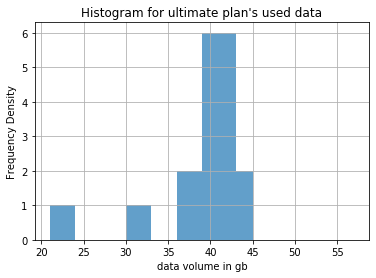

Mean for surf_data: 39.0
Variance for surf_data: 21.74
Standard deviation for surf_data: 4.66
Normally distributed data lies on: 25.01 and 52.98


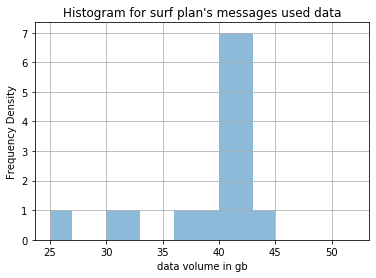

In [14]:
plan_data = full_data.pivot_table(index = ['plan','month'],values='gb_monthly',aggfunc='mean')
plan_data = plan_data.reset_index(level=['plan','month'])
surf_data = plan_data.query('plan == "surf"')
ultimate_data = plan_data.query('plan == "ultimate"').reset_index(drop=True)

mean_ud = np.mean(ultimate_data['gb_monthly'])
var_ud = np.var(ultimate_data['gb_monthly'])
std_ud = np.std(ultimate_data['gb_monthly'])
ud_bottom = mean_ud - 3 * std_ud
ud_top = mean_ud + 3 * std_ud
print("Mean for ultimate_data:",round(mean_ud,2))
print("Variance for ultimate_data:",round(var_ud,2))
print("Standard deviation for ultimate_data:",round(std_ud,2))
print("Normally distributed data lies on:",round(ud_bottom,2),'and',round(ud_top),2)

ultimate_data.hist('gb_monthly',bins=[21,24,27,30,33,36,39,43,45,48,51,54,57],grid=True,alpha=0.7)
plt.title("Histogram for ultimate plan's used data")
plt.xlabel('data volume in gb')
plt.ylabel('Frequency Density')
plt.show()

mean_sd = np.mean(surf_data['gb_monthly'])
var_sd = np.var(surf_data['gb_monthly'])
std_sd = np.std(surf_data['gb_monthly'])
sd_bottom = mean_sd - 3 * std_sd
sd_top = mean_sd + 3 * std_sd
print("Mean for surf_data:",round(mean_sd,2))
print("Variance for surf_data:",round(var_sd,2))
print("Standard deviation for surf_data:",round(std_sd,2))
print("Normally distributed data lies on:",round(sd_bottom,2),'and',round(sd_top,2))

surf_data.hist('gb_monthly',bins=[25,27,30,33,36,38,40,43,45,49,52],grid=True,alpha=0.5)
plt.title("Histogram for surf plan's messages used data")
plt.xlabel('data volume in gb')
plt.ylabel('Frequency Density')
plt.show()

Here also we have a same distribution negative skew which means median bigger than mean.Here we have compared average volume of data used per month. Outiliers lies on outside of normal distrubuted data. As we see 2 plans have very similar graphs. Both graphs peek occurs around 40. Both have same maximum which is at 45. and `ultimate's` minimum above 20 and `surf`'s above 25 gb.

### Conclusion

On this step we have learned how data is distributed.More detailed conclusion for each graph given above,so here will be considered more general conclusion. Let's first consider positive and negative skew. Positive skew stands for `mean` bigger than `median`.Negative is vice versa of positive. On `call_duration` they have different distributions which means `ultimate` plan has a negative skew and `surf` positive skew. On `messages count` they distributed same which is positive. On `volume of data` they also distributed negatively and their graph very similar. 

### Step 4.  Test the hypotheses

In [15]:
ultimate = full_data.query('plan == "ultimate"')
surf = full_data.query('plan == "surf"')
alpha = 0.05

result1n = st.ttest_ind(ultimate['profit'],surf['profit'],equal_var=True)
print('p-value of null:',result1n.pvalue)
if (result1n.pvalue < alpha):
    print("We reject the null hypothesis for first hypothesis")
else:
    print("We can't reject the null hypothesis for first hypothesis")


p-value of null: 2.603057892651527e-67
We reject the null hypothesis for first hypothesis
p-value of alternative: 2.8739671572180135e-97
We reject the alternative hypothesis for first hypothesis


In [16]:
def city(row):
    cities = row['city']
    if("NY" in cities or "NJ" in cities):
        return 1
    return 0
full_data['region'] = full_data.apply(city,axis=1)
full_data.tail()

    

,user_id,calls_count,call_duration,gb_monthly,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,month,churn_month,profit,region
2251,1498,32,339,56.0,NaN,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2,NaN,430.0,1
2252,1499,35,346,37.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN,240.0,0
2253,1499,41,385,52.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN,390.0,0
2254,1499,39,308,43.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN,300.0,0
2255,1499,56,496,58.0,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,5,NaN,450.0,0


In [17]:
our_area = full_data.query('region == 1')
other_area = full_data.query('region == 0')

result2n = st.ttest_ind(our_area['profit'],other_area['profit'],equal_var=True)
print('p-value of null:',result2n.pvalue)
if (result2n.pvalue < alpha):
    print("We reject the null hypothesis for second hypothesis")
else:
    print("We can't reject the null hypothesis for second hypothesis")


p-value of null: 0.09853597199145821
We can't reject the null hypothesis for second hypothesis
p-value: 0.10055769892549
We can't reject the alternative hypothesis for second hypothesis


We take a significance level as `.05`.p-value stands for probability of experiment result getting close to mean.And when we draw curve upper point of curve will be mean.And curves edges which are lie on the ground very far from mean.So we would not take this values. By this we will select the best subset of data. `null` hypothesis states that `mean of the population in question equals A` and `alternative` states that `The mean of the population does not equal A`. So, We have used `st.ttest_ind()` method for checking hypotheses. And for `alternative` we have set `equal_var` parameter as **False** and **True** for `null`

### Step 5. Overall Conclusion

We have made lots of analysis on a data and we have found lots of information about a data  which we had. As wee see above `call_duration`'s average value in `ultimate` equals to 409.08 minutes and `surf`'s equals to 421.42 minutes. And users which are using `ultimate` plan sends about 46 messages and `surf`'s users sends about 49 messages each month on average.And both plans users uses around 39 gb of data each month on average.And we can say that they have a quite similar distribution on using internet montly. Let's turn to hypotheses. When testing first hypothesis we get rejected from `null` and `alternative` hypotheses. This means we can not prove or disprove plans' profits equal or not equal. Only thing that we can say that we can not accept hypotheses. Let's turn to second one. Also, only thing that we would say we will accept `null` and `alternative` hypothesis.This means that, `average profit` from users in NY-NJ area different from that of the users from other regions